<a href="https://colab.research.google.com/github/cuteAmi/LeadScore_logisticReg/blob/main/Copy_of_Logis_Reg_Lead_solu_Top.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step-1: Import necessary Libraries:

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step-2: Reading and Understanding the Data:

In [ ]:
# Read the Dataset:
leads = pd.read_csv("/content/Leads.csv")

In [ ]:
leads.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [ ]:
# Shape of the dataset:
leads.shape

(9240, 37)

In [ ]:
# Inspect the different columns in the datset:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
# Summary of the dataset:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
leads.describe(include=np.object)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,...,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,...,5,1,1,6,7,3,3,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,...,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,...,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


In [ ]:
# check the null values
# will use '.info':

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step-3 : Data Cleaning and Preparation:

In [ ]:
    # # checking the numbers of missing values in each columns:

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [ ]:
# Check the number of missing values in percentage foam:

leads.isnull().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

As, we can see there are lots of columns which is having high numbers of null values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe. So, will eliminate the columns having greater than 3000 missing values as they are no use.

In [ ]:
# Drop all the columns which have greater than 3000 missing values:

for col in leads.columns:
  if leads[col].isnull().sum() > 3000:
    leads.drop(col, 1, inplace=True)

In [ ]:
def drop_missing_columns(df,threshold):
  """
  This function drop the columns from DataFrame having missing values 
  are greater than a certain threshold values.
  Input:
    df : DataFrame from which we want to drop columns.
    threshold : Threshold integer value beyond which we will drop columns.
  Return : DataFrame with missing Columns removed.
  """

  for col in df.columns:
    if df[col].isnull().sum() > threshold:
      df.drop(col, 1, inplace = True)
  return df

In [ ]:
new_df = pd.read_csv('Leads.csv')
print(f"Data shape before dropping columns {new_df.shape}")
drop_missing_columns(new_df,3000)
print(f"Data shape after dropping columns {new_df.shape}")

Data shape before dropping columns (9240, 37)
Data shape after dropping columns (9240, 31)


In [ ]:
leads.shape

(9240, 31)

In [ ]:
# Check again the numbers of null values:

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Here, City has a lot missing values: we will transform it.

In [ ]:
# let's check city categories:

leads['City'].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [ ]:
city_mapper = {'Mumbai' : 'Maharastra',
               'Thane & Outskirts' : 'Maharastra',
               'Other Cities of Maharashtra' : 'Maharastra',
               'Other Metro Cities' : 'Others',
               'Other Cities' : 'Others',
               'Tier II Cities' : 'Others',
               'Select' : "Unknown",
               np.nan : "Unknown"}

In [ ]:
# will change the 'City' column name to 'State'
leads['State'] = leads['City'].replace(city_mapper, regex= True
                                       )

In [ ]:
leads['State'].unique()

array(['Unknown', 'Maharastra', 'Others'], dtype=object)

In [ ]:
# droping 'City' column:
leads.drop(['City'], axis=1, inplace=True)

In [ ]:
# like wise with 'Country' column:
# value counts of country column

leads['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

as we can see India has maximum counts. but other country has less than  1% counts: will transform 'Country' column, only in two parts: one is India and other country as 'Others'. 

In [ ]:
leads['Country_modified'] = leads["Country"].apply(lambda x: "Others" if x != "India" else "India")

In [ ]:
leads["Country_modified"].unique()

array(['Others', 'India'], dtype=object)

In [ ]:
# drop the 'Country' column as we have now 'Country_modified' column:

leads.drop(["Country"], axis=1, inplace=True)

In [ ]:
# let's check the percentage of missing values in each column:

round(100*(leads.isnull().sum() / len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [ ]:
# check null values :

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

There are a few columns which having level called 'Select'. tHese values are as good as missing values and hence need to identify the values counts of the level 'Select' in all the columns that it is present.

In [ ]:
# Get the value counts of all columns:

for columns in leads:
  print(leads[columns].astype('category').value_counts())
  print("----------------------------------------------------------")

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
----------------------------------------------------------
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
----------------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----

As, the above data 'Leads Profile', 'How did you hear abouot X Education', 'Specialization' columns have 'Select' level in rows. So, for that first we check levek of the columns.  

In [ ]:
leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [ ]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [ ]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

* So, above columns have 'Select' category. which is no use for Analysis. We will drop those columns.*

In [ ]:
# drop the columns:

leads.drop(['Lead Profile', 'How did you hear about X Education'], axis=1, inplace=True)

Also, there are so many columns which is no use in Analysis. So, we will drop that columns as well. we can check below which columns we are going to drop. 

In [ ]:
# first check columns:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'State', 'Country_modified'],
      dtype='object')

In [ ]:
# droping the unnecessary columns
leads.drop(['Do Not Call','Search', 'Magazine', 'Newspaper Article', 
            'X Education Forums', 'Newspaper','Digital Advertisement',
            'Through Recommendations','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque',], axis=1, inplace=True)

Column: 'What matters most to you in choosing a course' has mostly similar category. So, first let's check it's category. and if it is not so useful.. we can drop that column as well.

In [ ]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [ ]:
# So, mostly category is 'Better Career Prospect: 
# other categories not so important. 
# So. drop the column:

leads.drop(['What matters most to you in choosing a course'],axis=1, inplace=True)

In [ ]:
# Check again null values :

leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
State                                        0
Country_modified                             0
dtype: int64

Here, 'What is your current occupation' column has a lot of null values. but we already lost so many columns. So, we will not drop that column. instead we will focus on ros now. and if needed will drop null rows from the dataset from the column 'What is your current occupation'.

In [ ]:
# drop rows from the 'What is your current occupation' column.

leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [ ]:
# after drop such rows and column let's check null values again:
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
State                                       0
Country_modified                            0
dtype: int64

Similarly we can drop the rows which has null values.

In [ ]:
# Drop the null value in rows from the column 'TotalVisits':

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [ ]:
# Checking null value:

leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
State                                      0
Country_modified                           0
dtype: int64

In [ ]:
# Drop the null value in rows from the column 'Lead Source':

leads = leads[~pd.isnull(leads['Lead Source'])]

In [ ]:
# Checking null value:

leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
State                                      0
Country_modified                           0
dtype: int64

In [ ]:
# Drop the null value in rows from the column 'Specialization':

leads = leads[~pd.isnull(leads['Specialization'])]


In [ ]:
# Now check agin null values:

leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
State                                     0
Country_modified                          0
dtype: int64

Now, the data doesn't have any null values. Let's check the percentage of rows that we have retained.

In [ ]:
# check the shape of data after filter:
leads.shape

(6373, 16)

In [ ]:
print(len(leads.index))
print(len(leads.index)/9240) # 9240- total rows before filtring data:

6373
0.6897186147186147


As we can see we still have 69% of data which seems good for the Analysis.

In [ ]:
# Check Dataset agtain:

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,Unknown,Others
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,Unknown,India
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,Maharastra,India
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,Maharastra,India
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified,Maharastra,India


In [ ]:
# 'Prospect ID' and 'Lead Number' won't be use in the Analysis. will drop it:

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace=True)

In [ ]:
leads.head(3)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,Unknown,Others
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,Unknown,India
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,Maharastra,India


#  Step-4 : Performing numerical and categorical analysis on the data:

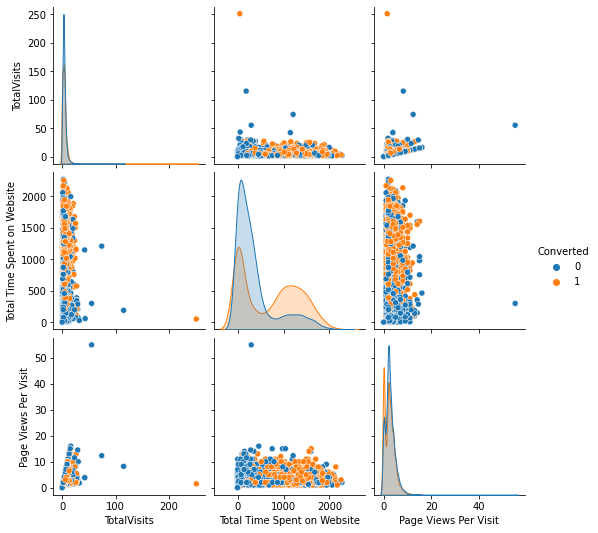

In [ ]:
sns.pairplot(leads, diag_kind='kde', hue='Converted')
plt.show()

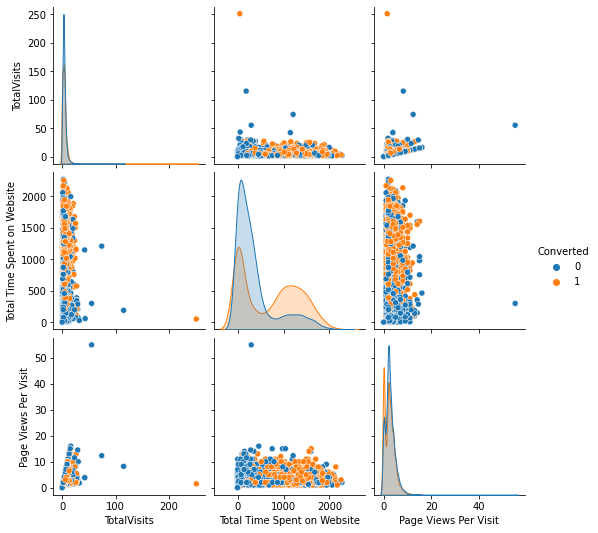

In [ ]:
edu = leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']]
sns.pairplot(edu, diag_kind='kde', hue='Converted')
plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformed_edu = pd.DataFrame(pt.fit_transform(edu))
transformed_edu.columns = edu.columns

transformed_edu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.539988,-1.532509,-1.534722,-0.962570
1,0.690854,0.641870,0.230818,-0.962570
2,-0.219742,1.262512,-0.019004,1.038885
3,-0.723932,0.153656,-0.629842,-0.962570
4,-0.219742,1.204175,-0.629842,1.038885


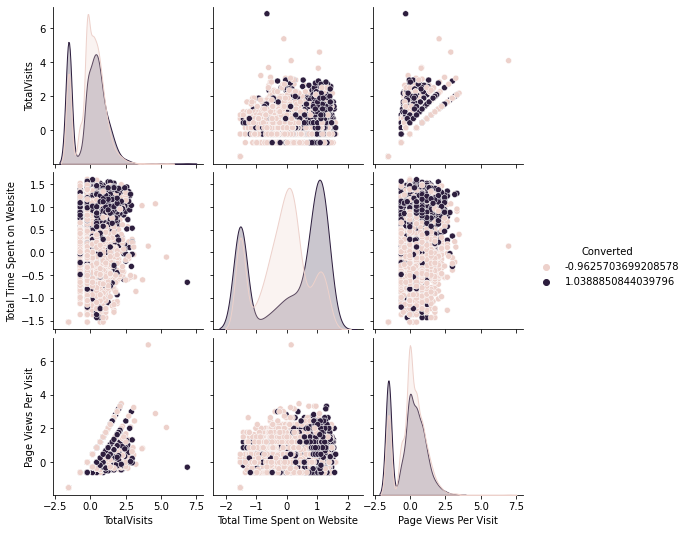

In [ ]:
sns.pairplot(transformed_edu, diag_kind = 'kde', hue = 'Converted')
plt.show()

## Create Heatmap for numerical Variables:

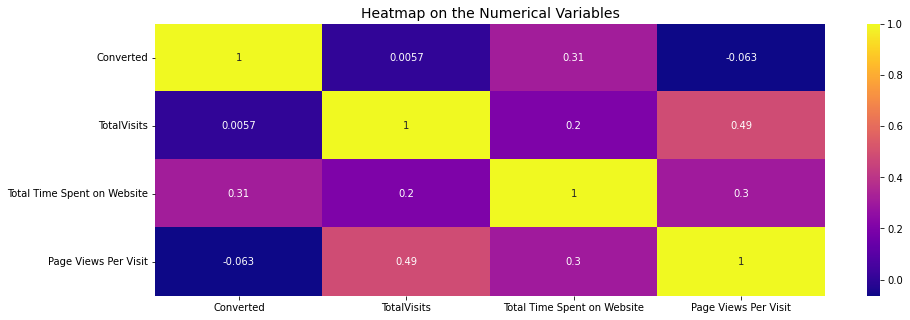

In [ ]:
plt.figure(figsize=(15,5))

# heatmap
sns.heatmap(leads.corr(), cmap="plasma", annot=True)
plt.title("Heatmap on the Numerical Variables",fontsize=14)
plt.show()

## Analsis the Numerical Variables with Boxplots:

In [ ]:
leads['Total Time Spent on Website'].describe()

count    6373.000000
mean      535.224541
std       565.374753
min         0.000000
25%        34.000000
50%       287.000000
75%      1022.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

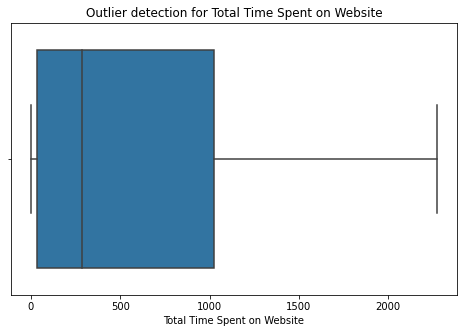

Median of 'Total Time Spent on Website' is 287.0


In [ ]:
# Outlier Detect the numerical variable using boxplot:

plt.figure(figsize=(8,5))
sns.boxplot(x=leads["Total Time Spent on Website"])
plt.title("Outlier detection for Total Time Spent on Website")
plt.show()

print("Median of 'Total Time Spent on Website' is", leads["Total Time Spent on Website"].median())

There is no outlier on "Total Time Spent on Website". So, no action required for this variable.

In [ ]:
# Analysis for 'TotalVisits':

leads['TotalVisits'].describe()

count    6373.000000
mean        3.624196
std         5.048555
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

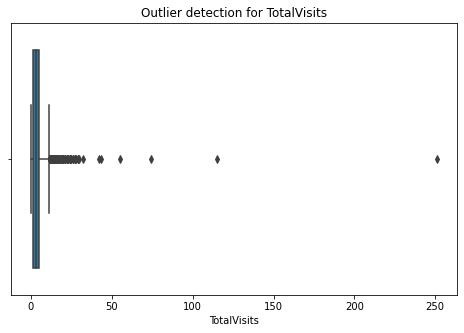

Median of TotalVisits is 3.0


In [ ]:
# create Boxplot:
plt.figure(figsize=(8,5))
sns.boxplot(x=leads['TotalVisits'])
plt.title('Outlier detection for TotalVisits')
plt.show()

print ('Median of TotalVisits is', leads['TotalVisits'].median())

Above plot has Outlier in the data.

In [ ]:
# Analysis for 'Page Views Per Visit':

leads["Page Views Per Visit"].describe()

count    6373.000000
mean        2.480464
std         2.167364
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        55.000000
Name: Page Views Per Visit, dtype: float64

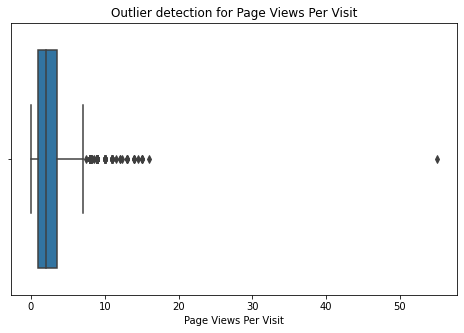

Median of Page Views Per Visit is 2.0


In [ ]:
# Boxplot for 'Page Views Per Visit':

plt.figure(figsize=(8,5))
sns.boxplot(x=leads['Page Views Per Visit'])
plt.title('Outlier detection for Page Views Per Visit')
plt.show()

print ('Median of Page Views Per Visit is', leads['Page Views Per Visit'].median())

# Step-5: Dummy Variable Creation:

Now, Deal with the categorical Variables present in the dataset. let's check which variables are actually categorical variable:

In [ ]:
# check the columns which has 'object' dtype:

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'State', 'Country_modified'],
      dtype='object')

In [ ]:
# Create the dummy variables using the 'get_dummies' command:

dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email',
                              'Last Activity','What is your current occupation',
                              'A free copy of Mastering The Interview', 'Last Notable Activity']], 
                       drop_first=True)

# Add the results to the master dataframe:
leads = pd.concat([leads, dummy], axis=1)

For 'Specialization' we create sepratly dummy variable.since, it has the level 'Select' which is no use. so, we will drop that level.

In [ ]:
# Creting Dummy variable for 'Specialization':
# and drop 'Select' level as no use.

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis=1)

In [ ]:
# Drop the variables for which the dummy variables have been created:

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [ ]:
# checking Dataset:

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,State,Country_modified,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,Unknown,Others,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,Unknown,India,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,Maharastra,India,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Maharastra,India,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,Maharastra,India,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# droping 'State' and ' Country_modified' columns:

leads.drop(["State", "Country_modified"], axis=1, inplace=True)
leads.head(3)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step-6: Test-Train Split:

The next step is to split the datset into training and testing sets.

In [ ]:
# import required libraries:

from sklearn.model_selection import train_test_split

In [ ]:
# Put all the feature variables in X:

X = leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Put the target variable in y:

y = leads["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
# Split the datset into 70% train and 30% test:

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# check train dataset shape:

X_train.shape, y_train.shape

((4461, 74), (4461,))

In [ ]:
# check test dataset shape:

X_test.shape, y_test.shape

((1912, 74), (1912,))

# Step-7 : Scaling:

There are a few numeric variable present in the datset, which have different scales. So, scale thse variables.

In [ ]:
# import MinMax Scaler:

from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale the three numeric features present in the dataset:

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***Correlation:***

Let's check check correlation variable table:

In [ ]:
# Correlation table:

leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,...,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.025526,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,0.003203,0.045386,0.037867
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,...,0.062421,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,0.015230,0.052972,0.111284
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.133206,0.089105,0.084975,0.093730,0.095849,0.070983,0.050077,0.039433,0.111610,0.094875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.018603,0.014223,0.024919,0.026099,0.070983,-0.025339,-0.007261,0.022168,-0.007395,0.021190,...,-0.023773,-0.016437,-0.037930,-0.017920,-0.028459,1.000000,-0.010668,-0.006986,-0.023639,-0.017223
Specialization_Rural and Agribusiness,0.006964,0.068015,0.018767,0.027465,0.050077,-0.018872,-0.006251,0.021596,-0.006366,-0.037642,...,-0.020467,-0.014152,-0.032656,-0.015429,-0.024501,-0.010668,1.000000,-0.006014,-0.020352,-0.014828
Specialization_Services Excellence,-0.005142,0.015114,0.003203,0.015230,0.039433,-0.011155,-0.004093,0.053189,-0.004169,-0.027058,...,-0.013403,-0.009267,-0.021384,-0.010103,-0.016044,-0.006986,-0.006014,1.000000,-0.013327,-0.009710
Specialization_Supply Chain Management,0.005785,0.063383,0.045386,0.052972,0.111610,-0.035065,-0.001963,0.093536,-0.002431,-0.027074,...,-0.045353,-0.031358,-0.072362,-0.034188,-0.054292,-0.023639,-0.020352,-0.013327,1.000000,-0.032857


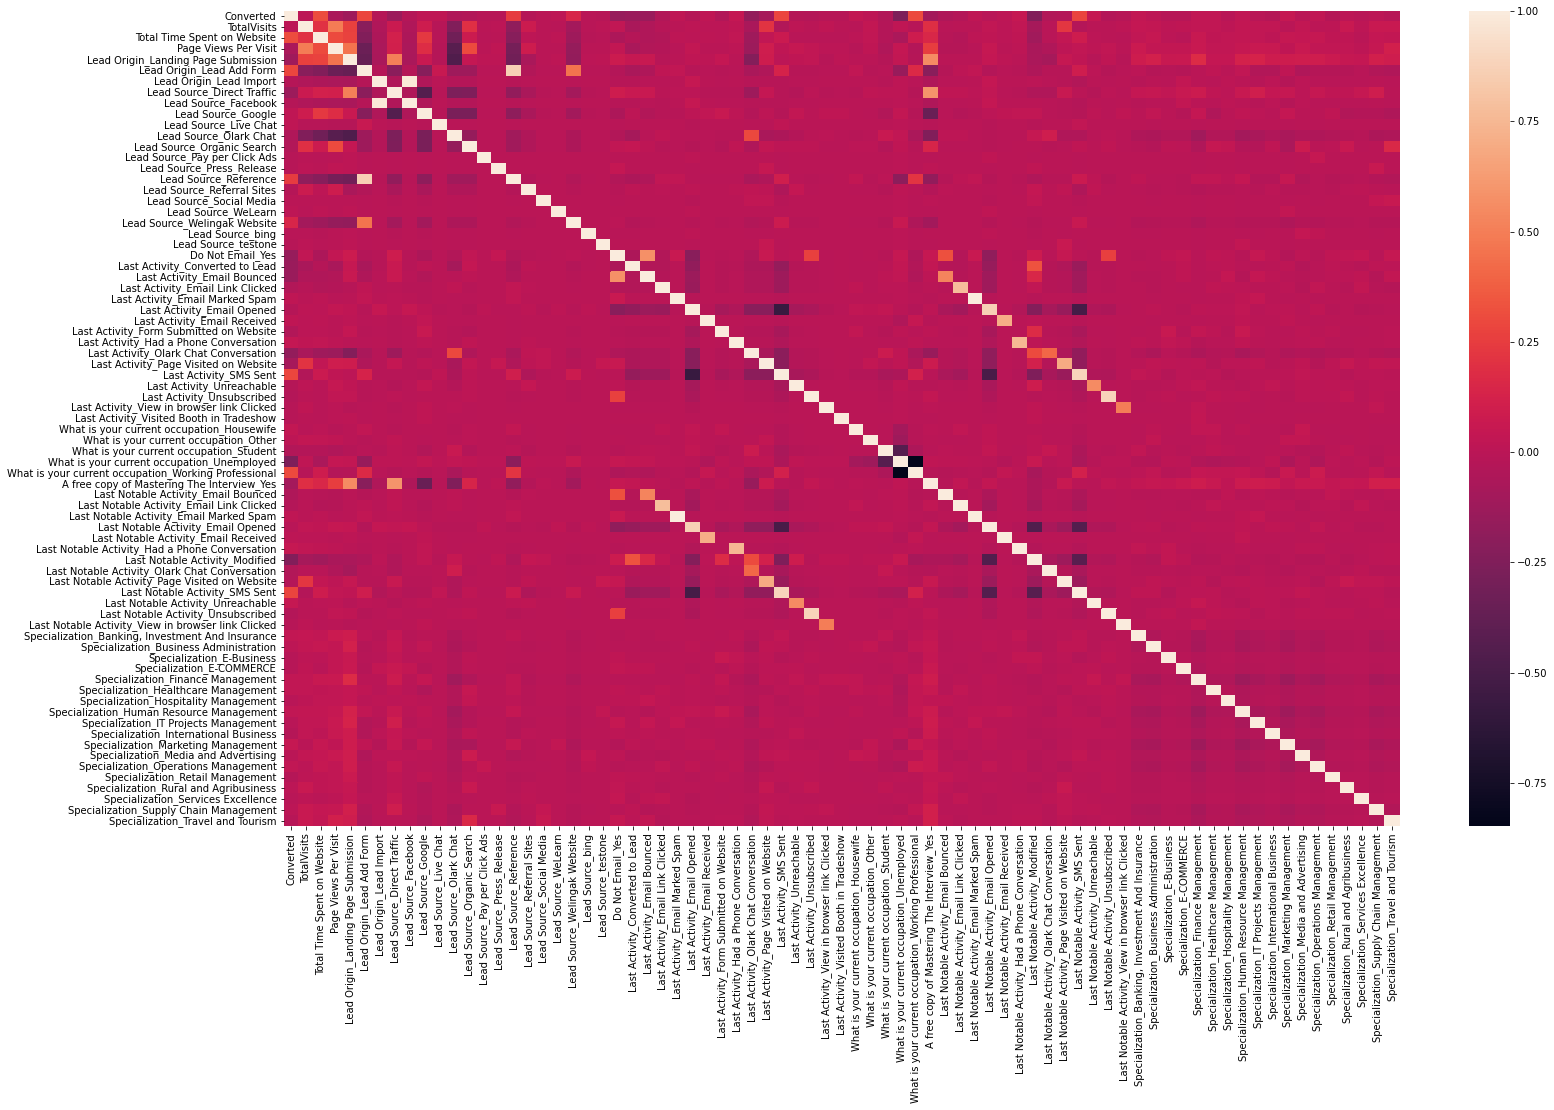

In [ ]:
# creating a heatmap:

plt.figure(figsize=(25,15))
sns.heatmap(leads.corr())
plt.show()

# Step-8 : Model Building:

There are lots of variables present in the dataset which we cannot deal with. So, the best way to approch this is to select a small set of features this pool of variables using RFE:

In [ ]:
# import 'LogisticRegression' and create a 'LogisticRegression' object:

from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.predict_proba(X_train)

array([[0.71165548, 0.28834452],
       [0.92032307, 0.07967693],
       [0.94723522, 0.05276478],
       ...,
       [0.10182112, 0.89817888],
       [0.88748822, 0.11251178],
       [0.5474528 , 0.4525472 ]])

In [ ]:
model.predict(X_train)

array([0, 0, 0, ..., 1, 0, 0])

# Train dataset:

In [ ]:
y_train

8003    0
218     0
4171    1
4037    1
3660    1
       ..
8759    1
100     0
5877    0
8658    0
8217    0
Name: Converted, Length: 4461, dtype: int64

In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[1938,  374],
       [ 516, 1633]])

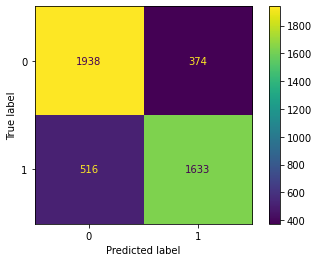

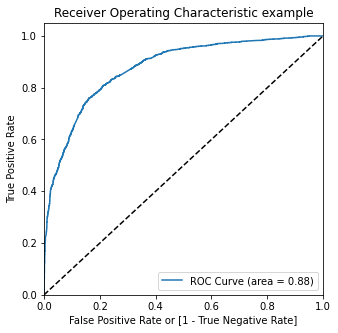

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy_score(y_train, y_train_pred)
precision_score(y_train, y_train_pred)
recall_score(y_train, y_train_pred)
f1_score(y_train, y_train_pred)
roc_auc_score(y_train, model.predict_proba(X_train) [:,1])

# ROC function:

from sklearn import metrics
def draw_roc (actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve (actual, probs)
    auc_score = metrics.roc_auc_score (actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic example')
    plt.legend(loc='lower right')
    plt.show()

    return None

actual = y_train
probs = model.predict_proba(X_train) [:, 1]
draw_roc(actual, probs)

In [ ]:
# class 0 (Not Converted) is negative:
# class 1 (Converted) is posittive:

# TP = 1633
# TN = 1938
# FP = 374
# FN = 516

In [ ]:
# Accuracy = (TP+TN) / (TP+TN+FP+FN) = 80.00%
# Precision = TP / (TP+FP) = 81.36%
# Recall = TP / (TP+FN) = 75.98%
# f1_score = 2 * (Recall*Precision) / (Recall+Precision) = 78.58%

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
accuracy_score(y_train, y_train_pred)

0.8004931629679444

In [ ]:
precision_score(y_train, y_train_pred)

0.8136522172396612

In [ ]:
recall_score(y_train, y_train_pred)

0.7598883201489065

In [ ]:
f1_score(y_train, y_train_pred)

0.785851780558229

In [ ]:
roc_auc_score(y_train, model.predict_proba(X_train)[:,1])

0.8768846779945931

## **Test Dataset:**

In [ ]:
y_test

4771    1
6122    0
9202    0
6570    1
2668    1
       ..
5828    0
6583    1
5531    0
3056    1
4088    1
Name: Converted, Length: 1912, dtype: int64

In [ ]:
model.predict_proba(X_test)

array([[0.00281689, 0.99718311],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [ ]:
model.predict_proba(X_test)[:, 1]

array([0.99718311, 1.        , 1.        , ..., 1.        , 1.        ,
       1.        ])

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[139, 857],
       [ 47, 869]])

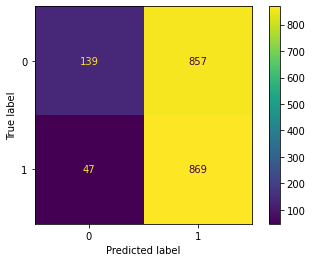

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [ ]:
accuracy_score(y_test, y_test_pred)

0.5271966527196653

In [ ]:
precision_score(y_test, y_test_pred)

0.503476245654693

In [ ]:
recall_score(y_test, y_test_pred)

0.9486899563318777

In [ ]:
f1_score(y_test, y_test_pred)

0.6578349735049205

In [ ]:
roc_auc_score(y_test, model.predict_proba(X_test) [:,1])

0.4800747750828642

### ROC Curve and AUC Score:

ROC Curve:[-receiver operating characteristic curve]:
https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

In [ ]:
# ROC function:

from sklearn import metrics
def draw_roc(actual, probs):
     fpr, tpr , thresholds = metrics.roc_curve(actual, probs)
     auc_score = metrics.roc_auc_score(actual, probs)
     plt.figure(figsize=(8,8))
     plt.plot(fpr, tpr, label='ROC Curve(area = %0.2f)' % auc_score)
     plt.plot([0,1], [0,1], "k--")
     plt.xlim([0.0, 1.0])
     plt.ylim([0.0, 1.05]) 
     plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
     plt.ylabel('True Positive Rate')
     plt.title('Receiver operating Characteristic example')
     plt.legend(loc = 'lower right')
     plt.show()

     return None

In [ ]:
actual = y_train
probs = model.predict_proba(X_train) [:,1]

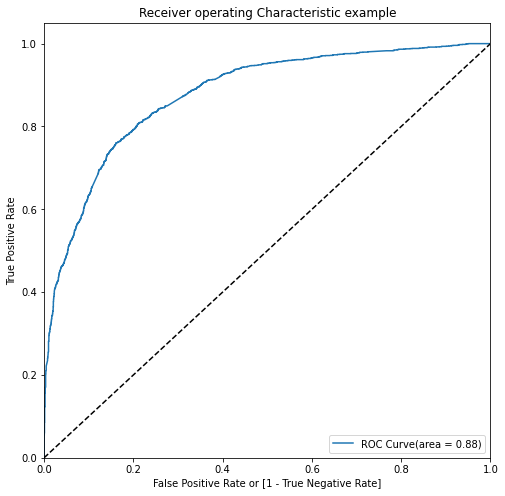

In [ ]:
draw_roc(actual, probs)

In [ ]:
actual = y_test
probs = model.predict_proba(X_test) [:, 1]

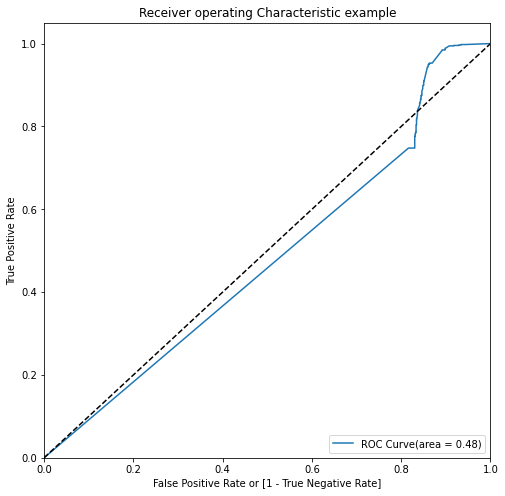

In [ ]:
draw_roc(actual, probs)

### Generating Score between 0-100 for Potential Leads

In [ ]:
X_train.loc[8003, :]

TotalVisits                               0.015936
Total Time Spent on Website               0.029489
Page Views Per Visit                      0.125000
Lead Origin_Landing Page Submission       1.000000
Lead Origin_Lead Add Form                 0.000000
                                            ...   
Specialization_Retail Management          0.000000
Specialization_Rural and Agribusiness     0.000000
Specialization_Services Excellence        0.000000
Specialization_Supply Chain Management    0.000000
Specialization_Travel and Tourism         0.000000
Name: 8003, Length: 74, dtype: float64

In [ ]:
y_train.loc[8003]

0

In [ ]:
model.predict(X_train)[0]

0

In [ ]:
estimated_probability = model.predict_proba(X_train)[0]

In [ ]:
# P(positive_class) + P(negative_class) = 1

In [ ]:
# P(positive_class)= 1 - P(negative_class)

In [ ]:
# estimated probability of a class being negative:

negative_class = estimated_probability[0]   # probabilty of negative class
negative_class
# if probability is greater than 0.5 then class is negative if less than that, it is positive.

0.7116554808036496

In [ ]:
# estimated probability of a clas being positive:

positive_class = estimated_probability[1]     # probability of positive class
positive_class
# if probability is less than 0.5 means it's positive and if greater than that is negative.

0.2883445191963504

In [ ]:
estimated_probability[0] + estimated_probability[1]

1.0

In [ ]:
# We have a focus on estimated probability of getting covversion.

estimated_probability = model.predict_proba(X_train)

In [ ]:
estimated_probability

array([[0.71165548, 0.28834452],
       [0.92032307, 0.07967693],
       [0.94723522, 0.05276478],
       ...,
       [0.10182112, 0.89817888],
       [0.88748822, 0.11251178],
       [0.5474528 , 0.4525472 ]])

In [ ]:
estimated_probability.ndim

2

In [ ]:
estimated_probability.shape

(4461, 2)

In [ ]:
estimated_probability_of_positive_class = estimated_probability

In [ ]:
estimated_probability_of_positive_class_list = []
for row in range(len(estimated_probability)):
    value = estimated_probability[row][1]
    estimated_probability_of_positive_class_list.append(value)

estimated_probability_of_positive_class_list

[0.2883445191963504,
 0.07967692872142539,
 0.052764782454958754,
 0.3463276217671416,
 0.9714232443073526,
 0.1189752826371748,
 0.11017354595275577,
 0.962638338452393,
 0.036487719341464525,
 0.9557590213734071,
 0.1472060434655472,
 0.08398551523132093,
 0.9738972385605176,
 0.5708602131222633,
 0.5986965567196691,
 0.9895654015544822,
 0.8262666410362064,
 0.7413529179791445,
 0.9034598107686145,
 0.8985145428706961,
 0.08026912682888969,
 0.7055666247137916,
 0.6680428944076878,
 0.19885528939450542,
 0.25224534585973907,
 0.3463276217671416,
 0.9971831145163614,
 0.07252023751616547,
 0.9068356429002383,
 0.22617012772997225,
 0.27014526166734226,
 0.2708492774630107,
 0.10450489222003059,
 0.8023728134897568,
 0.02326952431524016,
 0.9043367936757236,
 0.3519213592969076,
 0.09451451706504448,
 0.134215743936499,
 0.9293653886976901,
 0.11565515848328964,
 0.7122470113855205,
 0.231538496700959,
 0.06760300805138779,
 0.8387557903473385,
 0.17916462900772193,
 0.207920832438070

In [ ]:
predicated_probability_of_positive_class_list = model.predict(X_train).tolist()

In [ ]:
conversion_df = pd.DataFrame([estimated_probability_of_positive_class_list, predicated_probability_of_positive_class_list]).T

In [ ]:
conversion_df

,0,1
0,0.288345,0.0
1,0.079677,0.0
2,0.052765,0.0
3,0.346328,0.0
4,0.971423,1.0
...,...,...
4456,0.939408,1.0
4457,0.559800,1.0
4458,0.898179,1.0
4459,0.112512,0.0


In [ ]:
# making new Dataframe where columns are 'estimated_probability' and 'predicted_probability':
conversion_df.columns = ["estimated_probability", "predicted_probability"]

In [ ]:
conversion_df['predicted_probability'] = conversion_df['predicted_probability'].astype('int')

In [ ]:
# making a new column called 'Score' with estimated_probability and predicted_probability: 
conversion_df['Score'] = round(conversion_df['estimated_probability'] * 100,4)
conversion_df

,estimated_probability,predicted_probability,Score
0,0.288345,0,28.8345
1,0.079677,0,7.9677
2,0.052765,0,5.2765
3,0.346328,0,34.6328
4,0.971423,1,97.1423
...,...,...,...
4456,0.939408,1,93.9408
4457,0.559800,1,55.9800
4458,0.898179,1,89.8179
4459,0.112512,0,11.2512


# Step-9 : Improving Model Performance:

for improve model, now we will select more appropriate feature and removing any correlated features.

In [ ]:
# Import RFE and select 15 variables.
# Recursive feature Elimination , technique for doing feature selection.

from sklearn.feature_selection import RFE

rfe = RFE(model, n_features_to_select=15, step=1)     # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [ ]:
rfe.ranking_

array([ 1,  1, 23,  8,  1, 52, 24, 51, 36, 44,  1, 35, 43, 53,  1, 37, 58,
       42,  1, 33, 38,  1, 25,  4, 49, 57, 41, 54, 28,  1,  5, 26,  1, 47,
       40, 34, 48,  1, 46,  1,  1,  1, 50,  3, 20, 59, 27, 60,  1,  2, 32,
       31, 45,  1, 39, 29,  6, 15, 11,  9, 14, 10, 55, 16, 18, 22, 12, 21,
       19, 30,  7, 56, 13, 17])

In [ ]:
# Let's check at which features have been selected by RFE:

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [ ]:
# Put all the columns selected by RFE in the variable 'col':

col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

So here, We have all the variables selected by RFE.Now, looking for Statistic part, i.e. the 'p-value' and VIFs. let's use these variables to create a logistic regression model using statsmodels. 

In [ ]:
# Select only the columns which are selected by RFE:

X_train_new = X_train[col]
X_train_new

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8003,0.015936,0.029489,0,0,0,0,0,0,1,0,0,1,0,0,0
218,0.015936,0.082306,0,0,0,0,0,0,0,0,0,1,0,0,0
4171,0.023904,0.034331,0,0,0,0,0,0,0,0,0,1,0,0,0
4037,0.000000,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,0
3660,0.000000,0.000000,1,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,0.000000,0.000000,1,0,1,0,0,0,1,0,0,1,0,0,0
100,0.027888,0.718750,0,0,0,0,0,0,0,0,0,1,0,0,0
5877,0.011952,0.752201,0,0,0,0,0,0,1,0,0,1,0,0,0
8658,0.015936,0.187060,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Import statsmodels:

import statsmodels.api as sm 

In [ ]:
# fit a logistic Regression model on X_train after adding a constant and output the summary:

X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Wed, 04 May 2022   Deviance:                       4145.5
Time:                        01:29:54   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

There are quite a few variables which is greater than p-value(0.5). We will need to take care of them. But first, will check the VIFs.

In [ ]:
# import 'variance_inflation_factor':

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# makiing VIF dataframe for all the variables present:

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


VIFs seems to be decent axcept for three variables.'Lead Origin_Lead Add Form', 'Lead Source_Reference' and 'Lead Source_Welingak Website'. So, first let's drop 'Lead Origin_Lead Add Form'. since it has a high p-value as well as a high VIF.

In [ ]:
X_train_new.drop('Lead Origin_Lead Add Form', axis=1, inplace=True)

In [ ]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train_new)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.5
Date:                Wed, 04 May 2022   Deviance:                       4152.9
Time:                        01:29:54   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9896      0.599     -1.651      0.099      -2.164       0.185
TotalVisits                                             11.0456      2.657      4.157      0.000       5.838      16.253
Total Time Spent on Website                              4.4091      0.185     23.882      0.000       4.047       4.771
Lead Source_Olark Chat                                   1.4434      0.121     11.885      0.000       1.205       1.681
Lead Source_Reference                                    4.2314      0.264     16.018      0.000       3.714       4.749
Lead Source_Welingak Website                             6.3476      1.012      6.275      0.000       4.365       8.330
Do Not Email_Yes                                        -1.5073      0.193     -7.802      0.000      -1.886      -1.129
Last Activity_Had a Phone Conversation                   1.0369      0.982      1.056      0.291      -0.888       2.962
Last Activity_SMS Sent                                   1.1841      0.082     14.391      0.000       1.023       1.345
What is your current occupation_Housewife               22.6415   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1578      0.630     -1.838      0.066      -2.393       0.077
What is your current occupation_Unemployed              -1.3394      0.594     -2.255      0.024      -2.504      -0.175
What is your current occupation_Working Professional     1.2692      0.623      2.038      0.042       0.048       2.490
Last Notable Activity_Had a Phone Conversation          23.1922   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7793      0.807      3.445      0.001       1.198       4.360
========================================================================================================================
"""

In [ ]:
# check VIF dataframe:

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
2,Lead Source_Olark Chat,1.44
3,Lead Source_Reference,1.32
5,Do Not Email_Yes,1.09


In VIFs table all variables are now less than 5. So, as we can see 'Last Notable Activity_Had a Phone Conversation' has high p-value. OS, will drop it.

In [ ]:
X_train_new.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace=True)

In [ ]:
# Refit the model with new set of features:

logm1 = sm.GLM(y_train, (sm.add_constant(X_train_new)), family = sm.families.Binomial())

logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.3
Date:                Wed, 04 May 2022   Deviance:                       4158.6
Time:                        01:29:54   Pearson chi2:                 4.84e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9909      0.599     -1.654      0.098      -2.165       0.183
TotalVisits                                             11.1568      2.661      4.192      0.000       5.941      16.373
Total Time Spent on Website                              4.4017      0.184     23.858      0.000       4.040       4.763
Lead Source_Olark Chat                                   1.4432      0.121     11.883      0.000       1.205       1.681
Lead Source_Reference                                    4.2312      0.264     16.017      0.000       3.713       4.749
Lead Source_Welingak Website                             6.3473      1.012      6.275      0.000       4.365       8.330
Do Not Email_Yes                                        -1.5074      0.193     -7.803      0.000      -1.886      -1.129
Last Activity_Had a Phone Conversation                   2.7458      0.801      3.426      0.001       1.175       4.317
Last Activity_SMS Sent                                   1.1839      0.082     14.394      0.000       1.023       1.345
What is your current occupation_Housewife               21.6429   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1561      0.630     -1.836      0.066      -2.391       0.078
What is your current occupation_Unemployed              -1.3378      0.594     -2.253      0.024      -2.502      -0.174
What is your current occupation_Working Professional     1.2686      0.623      2.037      0.042       0.048       2.489
Last Notable Activity_Unreachable                        2.7783      0.807      3.444      0.001       1.197       4.359
========================================================================================================================
"""

here, 'What is your current occupation_Housewife' value is greater than p-value. let's drop it.
 

In [ ]:
X_train_new.drop('What is your current occupation_Housewife', axis=1, inplace=True)

In [ ]:
# Refit the model with the new set of feature:

logm1 = sm.GLM(y_train,(sm.add_constant(X_train_new)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2081.5
Date:                Wed, 04 May 2022   Deviance:                       4163.1
Time:                        01:29:55   Pearson chi2:                 4.85e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4394      0.553     -0.794      0.427      -1.524       0.645
TotalVisits                                             10.9643      2.647      4.142      0.000       5.776      16.152
Total Time Spent on Website                              4.3997      0.184     23.856      0.000       4.038       4.761
Lead Source_Olark Chat                                   1.4382      0.121     11.855      0.000       1.200       1.676
Lead Source_Reference                                    4.2288      0.264     16.015      0.000       3.711       4.746
Lead Source_Welingak Website                             6.3433      1.011      6.271      0.000       4.361       8.326
Do Not Email_Yes                                        -1.5100      0.193     -7.807      0.000      -1.889      -1.131
Last Activity_Had a Phone Conversation                   2.7470      0.801      3.428      0.001       1.176       4.318
Last Activity_SMS Sent                                   1.1836      0.082     14.391      0.000       1.022       1.345
What is your current occupation_Student                 -1.7032      0.588     -2.897      0.004      -2.856      -0.551
What is your current occupation_Unemployed              -1.8847      0.549     -3.431      0.001      -2.961      -0.808
What is your current occupation_Working Professional     0.7215      0.580      1.243      0.214      -0.416       1.859
Last Notable Activity_Unreachable                        2.7755      0.807      3.439      0.001       1.194       4.357
========================================================================================================================
"""

Drop 'What is your current occupation_Working Professional' as it's value is higher than p-value(0.05).

In [ ]:
X_train_new.drop('What is your current occupation_Working Professional', axis=1, inplace=True)

In [ ]:
# Refit the model:

logm1 = sm.GLM(y_train, (sm.add_constant(X_train_new)), family = sm.families.Binomial() )
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2082.3
Date:                Wed, 04 May 2022   Deviance:                       4164.5
Time:                        01:29:55   Pearson chi2:                 4.82e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2146      0.195      1.098      0.272      -0.168       0.598
TotalVisits                                   10.8566      2.640      4.112      0.000       5.682      16.031
Total Time Spent on Website                    4.4004      0.184     23.857      0.000       4.039       4.762
Lead Source_Olark Chat                         1.4378      0.121     11.859      0.000       1.200       1.675
Lead Source_Reference                          4.2283      0.264     16.016      0.000       3.711       4.746
Lead Source_Welingak Website                   6.3413      1.011      6.269      0.000       4.359       8.324
Do Not Email_Yes                              -1.5074      0.193     -7.797      0.000      -1.886      -1.129
Last Activity_Had a Phone Conversation         2.7507      0.801      3.433      0.001       1.180       4.321
Last Activity_SMS Sent                         1.1869      0.082     14.450      0.000       1.026       1.348
What is your current occupation_Student       -2.3564      0.281     -8.389      0.000      -2.907      -1.806
What is your current occupation_Unemployed    -2.5384      0.186    -13.671      0.000      -2.902      -2.174
Last Notable Activity_Unreachable              2.7767      0.807      3.441      0.001       1.195       4.358
==============================================================================================================
"""

As we can see, all values are now in the appropriate range. let's check VIF also, in case we had missed something.

In [ ]:
# Make VIF dataframe:

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Source_Olark Chat,1.33
3,Lead Source_Reference,1.12
4,Lead Source_Welingak Website,1.08
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


VIF also in range less than 5. So, we are good to go.

# Step-10 : Model Evaluation

The p-values and VIFs seems decent enough for all the variables. So, go ahead and make predictions using this final set of features.

In [ ]:
final_col = X_train_new.columns
X_train_new

,TotalVisits,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
8003,0.015936,0.029489,0,0,0,0,0,1,0,1,0
218,0.015936,0.082306,0,0,0,0,0,0,0,1,0
4171,0.023904,0.034331,0,0,0,0,0,0,0,1,0
4037,0.000000,0.000000,1,0,0,0,0,0,0,1,0
3660,0.000000,0.000000,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
8759,0.000000,0.000000,0,1,0,0,0,1,0,1,0
100,0.027888,0.718750,0,0,0,0,0,0,0,1,0
5877,0.011952,0.752201,0,0,0,0,0,1,0,1,0
8658,0.015936,0.187060,0,0,0,0,0,0,0,1,0


In [ ]:
X_test_new = X_test[final_col]
X_test_new

,TotalVisits,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,0.0,0,0,1,0,0,0,1,0,0,0
6122,7.0,66,0,0,0,0,0,0,0,1,0
9202,4.0,947,0,0,0,0,0,1,0,1,0
6570,3.0,861,0,0,0,1,0,1,0,1,0
2668,8.0,898,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5828,3.0,62,0,0,0,0,0,1,0,1,0
6583,3.0,346,0,0,0,0,0,1,0,1,0
5531,14.0,1595,0,0,0,0,0,0,0,1,0
3056,3.0,949,0,0,0,1,0,1,0,1,0


### Building New Model:

Build the new model after doinmg feature selection and removing highly correlated values and statistically insignificant feature.

In [ ]:
model_new = LogisticRegression()
model_new.fit(X_train_new, y_train)

LogisticRegression()

In [ ]:
model_new.predict(X_train_new)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
model_new.predict_proba(X_train_new) [:,1]

array([0.32201454, 0.15791545, 0.13479893, ..., 0.90497698, 0.22474889,
       0.38983247])

### New Model: Train and Test Evaluation:

Train dataset:

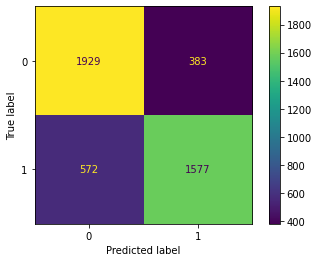

In [ ]:
y_train
y_train_pred = model_new.predict(X_train_new)
confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay.from_estimator(model_new, X_train_new, y_train)

In [ ]:
# Accuracy score:
accuracy_score(y_train, y_train_pred)

0.7859224389150414

In [ ]:
# Precision Score:
precision_score(y_train, y_train_pred)

0.8045918367346939

In [ ]:
# Recall Score:
recall_score(y_train, y_train_pred)

0.7338296882270824

In [ ]:
# f1_Score:
f1_score(y_train, y_train_pred)

0.767583353614018

In [ ]:
# Roc_auc_score:
roc_auc_score(y_train, y_train_pred)

0.7840861243903579

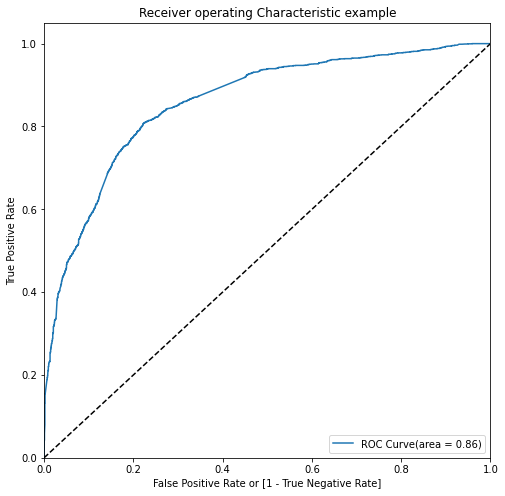

In [ ]:
# draw_roc:
draw_roc(y_train, model_new.predict_proba(X_train_new) [:,1])

The area under the curve of the ROC is 0.86 which is quite good. So, we seem to have a good model.Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

# Test Dataset:

In [ ]:
y_test

4771    1
6122    0
9202    0
6570    1
2668    1
       ..
5828    0
6583    1
5531    0
3056    1
4088    1
Name: Converted, Length: 1912, dtype: int64

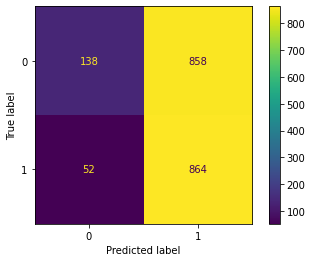

In [ ]:
y_test_pred = model_new.predict(X_test_new)
confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay.from_estimator(model_new, X_test_new, y_test)

In [ ]:
accuracy_score(y_test, y_test_pred)

0.5240585774058577

In [ ]:
precision_score(y_test, y_test_pred)


0.5017421602787456

In [ ]:
recall_score(y_test, y_test_pred)

0.9432314410480349

In [ ]:
f1_score(y_test, y_test_pred)

0.6550416982562548

In [ ]:
roc_auc_score(y_test, model_new.predict_proba(X_test_new) [:,1])

0.47640452640255354

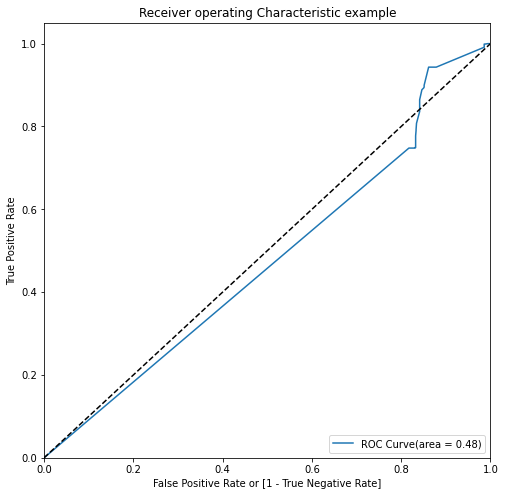

In [ ]:
draw_roc(y_test, model_new.predict_proba(X_test_new)[:,1])

0.5 was just arbitrary to loosely check the model performance. BUt, in order to get good results, you need to optimise the threshold. So, first let's plot an ROC Curve to see what AUC we will get.

Changing Hyperparameters of the logistic Regression Model

### **Kneighbors model**

For, more accuarcy in logistic Regression, we are going to use Kneighbors model.

In [ ]:
from sklearn.linear_model import  LogisticRegression

In [ ]:
logistic_model = LogisticRegression(penalty='elasticnet', tol=0.00001 , C=100.0, solver='saga', max_iter=10000, l1_ratio=0.70)

In [ ]:
logistic_model.fit(X_train_new, y_train)

LogisticRegression(C=100.0, l1_ratio=0.7, max_iter=10000, penalty='elasticnet',
                   solver='saga', tol=1e-05)

In [ ]:
roc_auc_score(y_test, logistic_model.predict_proba(X_test_new)[:,1])

0.47209471072061165

In [ ]:
# Impotr KNeighbors model from sklearn:

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
nn_model = KNeighborsClassifier()
nn_model.fit(X_train_new, y_train)

KNeighborsClassifier()

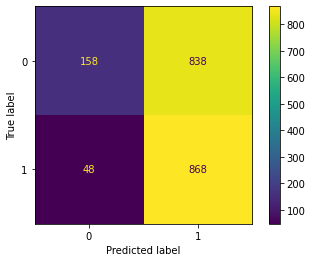

In [ ]:
y_test_pred = nn_model.predict(X_test_new)
confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay.from_estimator(nn_model, X_test_new, y_test)

In [ ]:
accuracy_score(y_test, y_test_pred)

0.5366108786610879

In [ ]:
precision_score(y_test, y_test_pred)

0.5087924970691676

In [ ]:
recall_score(y_test, y_test_pred)

0.9475982532751092

In [ ]:
f1_score(y_test, y_test_pred)

0.662090007627765

In [ ]:
roc_auc_score(y_test, nn_model.predict_proba(X_test_new)[:, 1])

0.7569480980691324

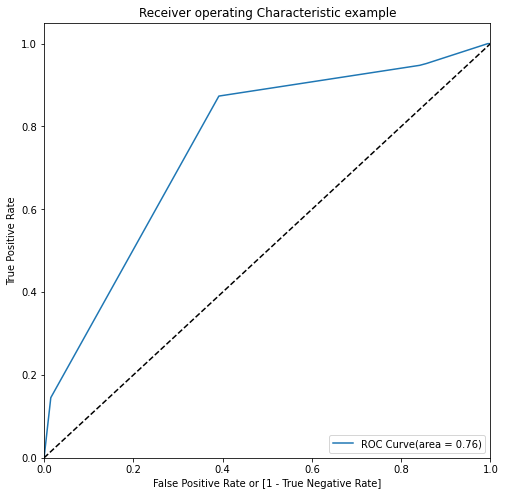

In [ ]:
draw_roc(y_test, nn_model.predict_proba(X_test_new) [:,1])

## Step- 11: Advance Model

### **Decision Tree Classifier:**

Here, we are using "Decision Tree" model for out advance model, for more accuracy.

In [ ]:
# Import Decisiontree library from sklearn :

from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_train_pred = clf.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[2256,   56],
       [  78, 2071]])

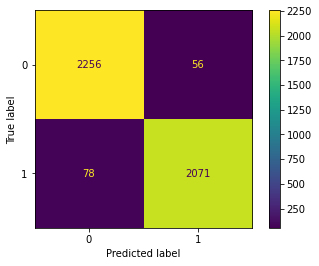

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
accuracy_score(y_train, y_train_pred)

0.9699618919524771

In [ ]:
precision_score(y_train, y_train_pred)

0.9736718382698637

In [ ]:
recall_score(y_train, y_train_pred)

0.9637040483946021

In [ ]:
f1_score(y_train, y_train_pred)

0.9686623012160899

In [ ]:
roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])

0.9974064544384529

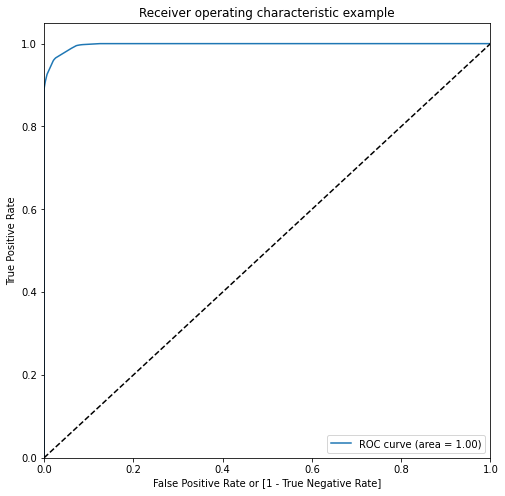

In [ ]:
# ROC function
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

actual = y_train
probs = clf.predict_proba(X_train)[:,1]
draw_roc(actual,probs)

Great job.. as we can see, our advance model which is 'Decision Tree' Classifer is the model which we can say the best model.as we get ROC Curve mostly nearest to 1. that means mostly positive side. our Model accuracy is so high. So, we can say that this model is the best model to good to apply in our Analysis, for further implimentation.

In [ ]:
y_test

4771    1
6122    0
9202    0
6570    1
2668    1
       ..
5828    0
6583    1
5531    0
3056    1
4088    1
Name: Converted, Length: 1912, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_new, y_train)

DecisionTreeClassifier()

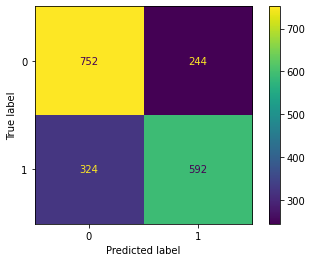

In [ ]:
y_test_pred = clf.predict(X_test_new)
confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay.from_estimator(clf, X_test_new, y_test)

In [ ]:
accuracy_score(y_test, y_test_pred)

0.702928870292887

In [ ]:
precision_score(y_test, y_test_pred)

0.7081339712918661

In [ ]:
recall_score(y_test, y_test_pred)

0.6462882096069869

In [ ]:
f1_score(y_test, y_test_pred)

0.6757990867579909

In [ ]:
roc_auc_score(y_test, clf.predict_proba(X_test_new)[:, 1])

0.6868861910524192

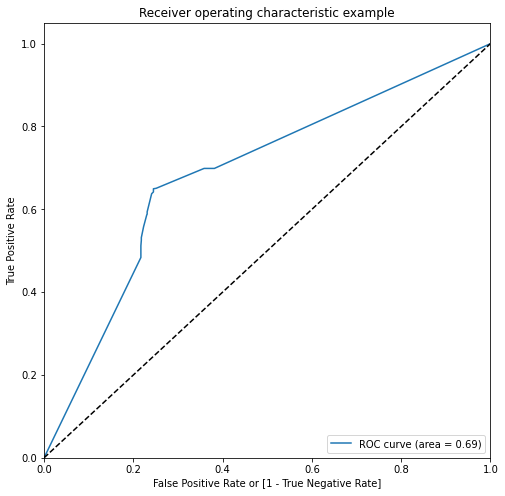

In [ ]:
draw_roc(y_test, clf.predict_proba(X_test_new) [:,1])